In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import sys
%matplotlib inline

In [3]:
from StringIO import StringIO

In [6]:
# generate coverage per bin for pileup file
blocksize = 10000
pos_count = 0
n_strains = 13
df = pd.DataFrame()
with open('../pileup_all.txt', 'r') as f:
    while True:
        array_temp = np.zeros((blocksize, n_strains+1))
        for i in range(blocksize):
            line = f.readline().split()
            if not line:
                break
            if i==0:
                chr0 = line[0]
            if line[0]!=chr0:
                array_temp = array_temp[:i]
                break
            array_temp[i,0] = pos_count
            array_temp[i,1:n_strains+1] = [int(line[3*(s+1)]) for s in range(n_strains)]
            pos_count+=1
        d1 = {'chr': chr0, 'pos': np.median(array_temp[:,0])}
        d2 = {s+17: np.median(array_temp[:,s+1]) for s in range(n_strains)}
        df = df.append(dict(d1.items()+d2.items()), ignore_index=True)
        if not line:
            break

KeyboardInterrupt: 

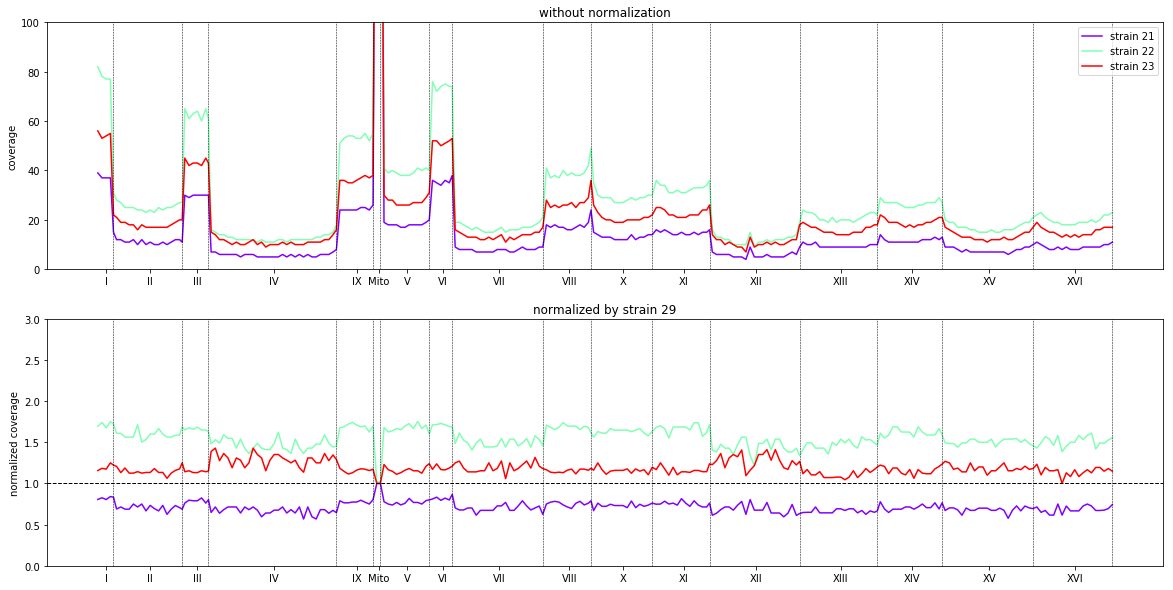

In [154]:
# plot absolute and normalized coverage
fig, ax = plt.subplots(2,1,figsize=(20,10))
labels = []
ticks = []
plot_strains = [21,22,23]
norm_strains = range(17,29)

color=iter(cm.rainbow(np.linspace(0,1,len(plot_strains))))

for n in norm_strains:
    df_norm = df[norm_strains].quantile(q=0.4, axis=1)

for s in plot_strains:
    c=next(color)
    ax[0].plot(df.pos, df[s], linestyle='-',label='strain '+str(s), color=c)
    ax[1].plot(df.pos, df[s]/df_norm, color=c)
    
for chr_i in df.chr.unique():
    pos_i = df.pos[df.chr==chr_i]
    labels.append(chr_i)
    ticks.append(np.median(pos_i))
    ax[0].axvline(x=np.max(pos_i), linestyle='--', color='k', linewidth=0.5)
    ax[1].axvline(x=np.max(pos_i), linestyle='--', color='k', linewidth=0.5)

ax[0].set_xticks(ticks)
ax[0].set_xticklabels(labels)
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(labels)
ax[1].axhline(y=1, linestyle='--', color='k', linewidth=1)
ax[0].set_ylim([0,100])
ax[1].set_ylim([0,3])
ax[0].set_title('without normalization')
ax[1].set_title('normalized by strain 29')
ax[0].set_ylabel('coverage')
ax[1].set_ylabel('normalized coverage')
ax[0].legend(loc=0)

plt.savefig('coverage_29to40_norm29_5kb.pdf')